In [1]:
filepath = r"C:\Users\Special User\Downloads\Electric_cars_dataset.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
car = pd.read_csv(filepath)

In [4]:
car.head()

ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA   98037.0      2020.0   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA   98229.0      2011.0   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA   98422.0      2015.0   
3  EV55713  1G1RD6E44D       King     REDMOND    WA   98053.0      2013.0   
4  EV28799  1G1FY6S05K     Pierce    PUYALLUP    WA   98375.0      2019.0   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
4  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3           Clean Alternative Fuel Vehicle Eligible              38   
4           Clean Alternative Fuel Vehicle Eligible             238   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  32.0       109821694   
1          0                  40.0       137375528   
2          0                  27.0       150627382   
3          0                  45.0       258766301   
4          0                  25.0       296998138   

                Vehicle Location  \
0   POINT (-122.287614 47.83874)   
1  POINT (-122.414936 48.709388)   
2  POINT (-122.396286 47.293138)   
3  POINT (-122.024951 47.670286)   
4  POINT (-122.321062 47.103797)   

                                    Electric Utility Expected Price ($1k)  
0                             PUGET SOUND ENERGY INC                   50  
1                             PUGET SOUND ENERGY INC                   15  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                   18  
3      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                 33.9  
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                41.78

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import re  # Import the regular expressions module for pattern matching and text processing
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns  # For enhanced data visualizations

# Import libraries for machine learning models and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from sklearn.linear_model import LinearRegression, ElasticNet  # For linear Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regression
from sklearn.svm import SVR  # For Support Vector Regression 
#import xgboost as xgb # For XGBoost Regression
from sklearn.model_selection import cross_validate  # To perform cross-validation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV   # For hyperparameter tuning

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

OBSERVATIONS
There are 64353 entries and 18 columns
Most columns are objects and expected price is an object but it should be int
There are missing values so we have to handle nan
Model Year the decimal place at the back should be removed(int)
Zip code the decimal place should be removed(int)


In [8]:
car.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

OBSERVATIONS
Compared to the size of my dataset, the missing values are small, so I will drop all the missing values to ensure more accuracy with my dataset

In [9]:
car.describe()

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               49.000000    4.789346e+08

In [10]:
car.describe(include ='object')

ID  VIN (1-10) County     City  State   Make    Model  \
count     64353       64353  64349    64344  64342  64349    64340   
unique    64353        5644    139      544     38     34      107   
top     EV33174  5YJYGDEE9M   King  SEATTLE     WA  TESLA  MODEL 3   
freq          1         340  33552    11887  64168  27903    13138   

                 Electric Vehicle Type  \
count                            64353   
unique                               2   
top     Battery Electric Vehicle (BEV)   
freq                             47869   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
count                                              64353   
unique                                                 3   
top              Clean Alternative Fuel Vehicle Eligible   
freq                                               39948   

                     Vehicle Location  \
count                           63843   
unique                            668   
top     POINT (-122.122018 47.678465)   
freq                             1712   

                                     Electric Utility Expected Price ($1k)  
count                                           63631                64353  
unique                                             68                  210  
top     PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                   69  
freq                                            22555                 4816

OBSERVATIONS
ID has 64353 values meaning it is just an identifier, not useful in my model


In [14]:
car['Expected Price ($1k)'] = car['Expected Price ($1k)'].astype(float)

In [12]:
#realised i had an entry N in my price so i converted to nan then dropped
car['Expected Price ($1k)'] = car['Expected Price ($1k)'].replace('N/', np.nan)

In [13]:
car = car.dropna(subset=['Expected Price ($1k)'])

In [15]:
car = car.dropna(subset=['Electric Utility', 'Vehicle Location', 'Legislative District', 'Model', 'Make', 'ZIP Code', 'State', 'City', 'County'])

In [16]:
car.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           7
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [17]:
car = car.dropna(subset=['Model Year'])

In [18]:
car['ZIP Code'] = car['ZIP Code'].astype(int)
car['Model Year'] = car['Model Year'].astype(int)

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63081 non-null  object 
 1   VIN (1-10)                                         63081 non-null  object 
 2   County                                             63081 non-null  object 
 3   City                                               63081 non-null  object 
 4   State                                              63081 non-null  object 
 5   ZIP Code                                           63081 non-null  int32  
 6   Model Year                                         63081 non-null  int32  
 7   Make                                               63081 non-null  object 
 8   Model                                              63081 non-null  object 
 9   Electric Ve

In [20]:
car.describe()

ZIP Code    Model Year  Electric Range      Base MSRP  \
count  63081.000000  63081.000000    63081.000000   63081.000000   
mean   98252.381827   2018.187109      107.088569    2529.523866   
std      330.715600      2.725192      104.111828   12431.057011   
min    59937.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98119.000000   2018.000000       73.000000       0.000000   
75%    98368.000000   2021.000000      215.000000       0.000000   
max    99403.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  Expected Price ($1k)  
count          63081.000000    6.308100e+04          63081.000000  
mean              30.060383    1.973738e+08             45.476095  
std               14.665353    1.070546e+08             24.757155  
min                0.000000    4.385000e+03              0.000000  
25%               20.000000    1.373311e+08             22.857000  
50%               34.000000    1.754003e+08             40.000000  
75%               43.000000    2.300375e+08             67.070000  
max               49.000000    4.789346e+08           1100.000000

OBSERVATIONS 
Electric range, base msrp have a minimum value of 0.00, i should come back and remove outliers if my model doesnt have high ccuracy

UNIVARIATE ANALYSIS

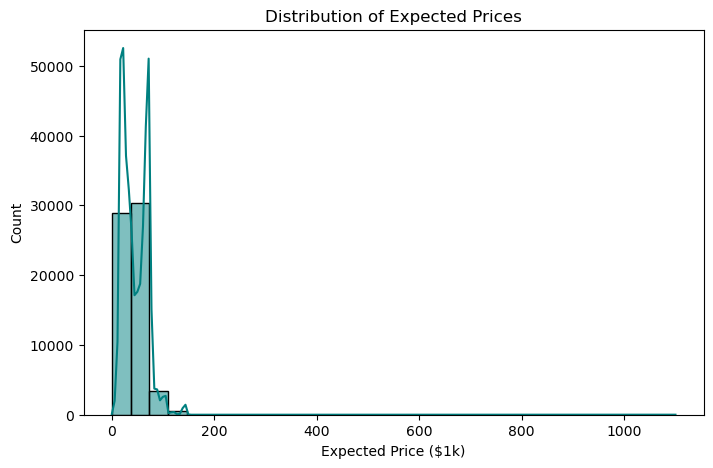

In [21]:
plt.figure(figsize=(8, 5))

sns.histplot(car["Expected Price ($1k)"], bins=30, kde=True, color="teal")
plt.title("Distribution of Expected Prices")
plt.show()

In [22]:
numerical_features = car.select_dtypes(include='number').columns
len(numerical_features)

7

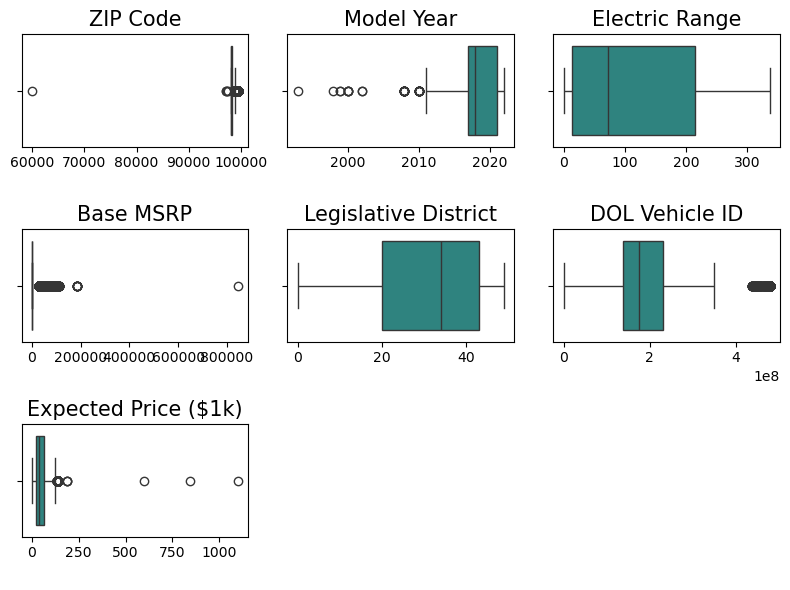

In [23]:
plt.figure(figsize=(8, 6))
for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = car[numerical_features[i]], palette = 'viridis')
    plt.title(numerical_features[i], fontsize = 15)
    plt.xlabel(' ')
    plt.tight_layout()

In [24]:
categorical_features = car.select_dtypes(include='object').columns
len(categorical_features)

11

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x = car[categorical_features[i]], palette = 'viridis')
    plt.title(categorical_features[i], fontsize = 10)
    plt.xlabel(' ')
    plt.xticks(rotation=90)
    plt.tight_layout()

KeyboardInterrupt: 

BIVARIATE ANALYSIS

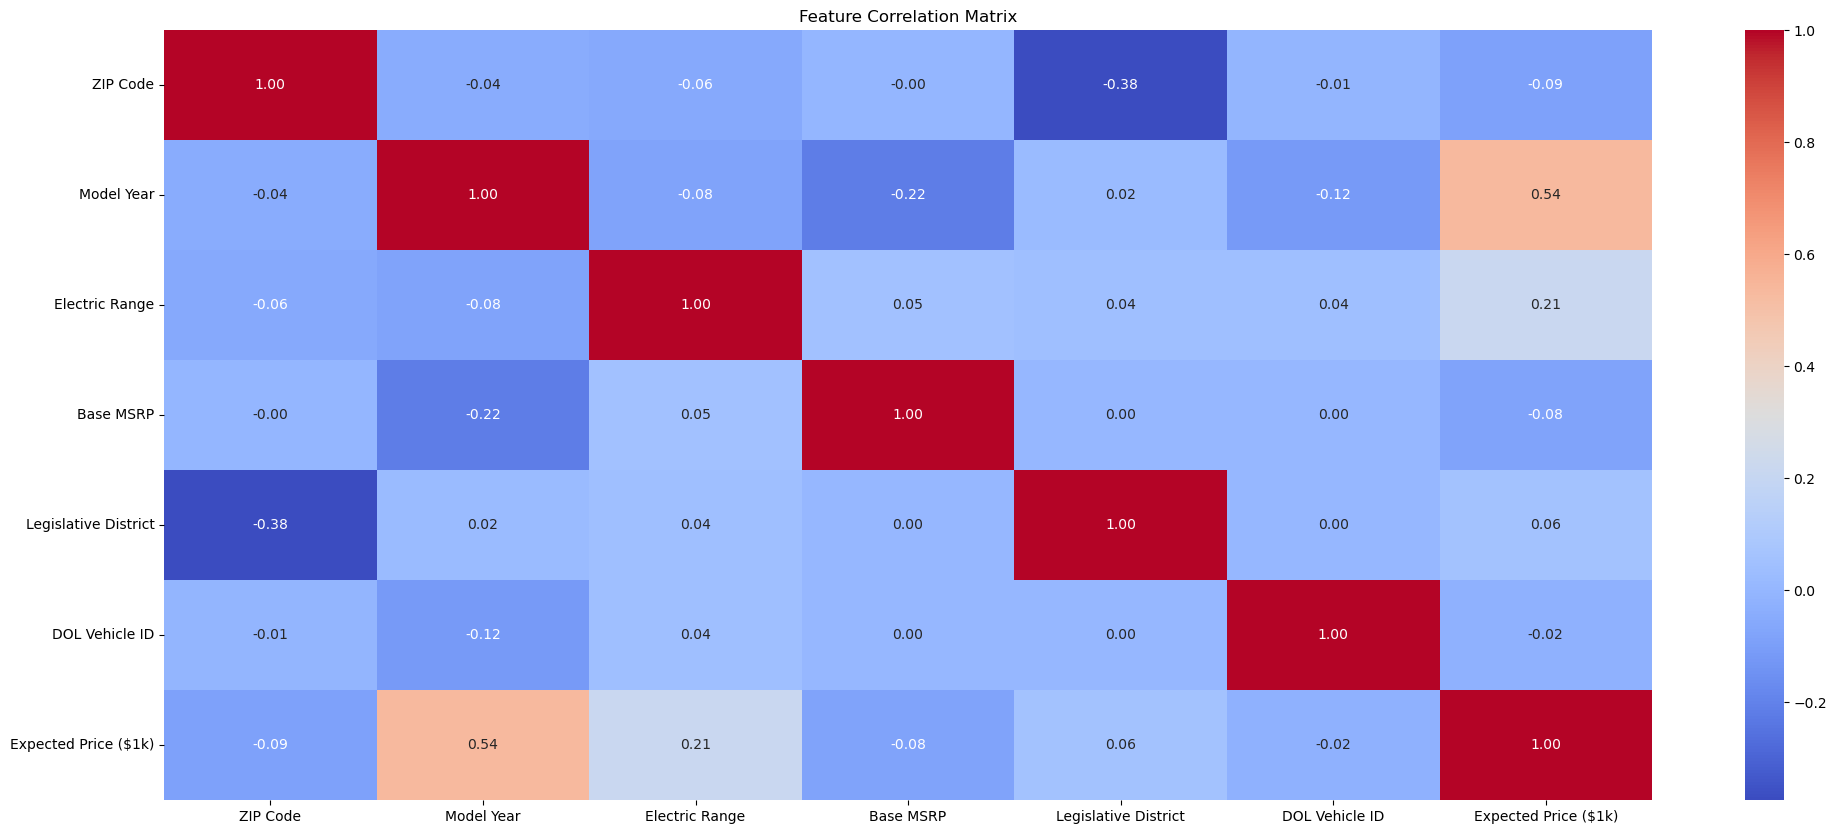

In [25]:
## Correlation matrix of numerical features
plt.figure(figsize=(24, 10))
correlation_matrix = car[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 15))  # Reduce figure size for better visibility
for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)  # Adjust grid to 2x3 (or whatever fits best)
    sns.boxplot(x=categorical_features[i], y='Expected Price ($1k)', data=car, palette='viridis')
    plt.title(f'Expected Price vs. {categorical_features[i]}', fontsize=15)
    plt.xlabel(categorical_features[i], fontsize=12)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.ylabel('Expected Price ($1k)', fontsize=12)  # Add y-axis label for clarity

# Apply tight_layout after all subplots are created
plt.tight_layout()
plt.show()

In [26]:
 #since my categorical data reports keep on hanging, i will do profile report
from ydata_profiling import ProfileReport
profile = ProfileReport(car, title="Dataset Profile Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Modelling
Converting the categorical columns i want to use to numerical 

In [27]:
car.head()

ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA     98037        2020   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA     98229        2011   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA     98422        2015   
3  EV55713  1G1RD6E44D       King     REDMOND    WA     98053        2013   
4  EV28799  1G1FY6S05K     Pierce    PUYALLUP    WA     98375        2019   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
4  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3           Clean Alternative Fuel Vehicle Eligible              38   
4           Clean Alternative Fuel Vehicle Eligible             238   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  32.0       109821694   
1          0                  40.0       137375528   
2          0                  27.0       150627382   
3          0                  45.0       258766301   
4          0                  25.0       296998138   

                Vehicle Location  \
0   POINT (-122.287614 47.83874)   
1  POINT (-122.414936 48.709388)   
2  POINT (-122.396286 47.293138)   
3  POINT (-122.024951 47.670286)   
4  POINT (-122.321062 47.103797)   

                                    Electric Utility  Expected Price ($1k)  
0                             PUGET SOUND ENERGY INC                 50.00  
1                             PUGET SOUND ENERGY INC                 15.00  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                 18.00  
3      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                 33.90  
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                 41.78

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63081 non-null  object 
 1   VIN (1-10)                                         63081 non-null  object 
 2   County                                             63081 non-null  object 
 3   City                                               63081 non-null  object 
 4   State                                              63081 non-null  object 
 5   ZIP Code                                           63081 non-null  int32  
 6   Model Year                                         63081 non-null  int32  
 7   Make                                               63081 non-null  object 
 8   Model                                              63081 non-null  object 
 9   Electric Ve

In [29]:
categorical_cols = ['County', 'Make','Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility'] 

In [30]:
car = pd.get_dummies(car, columns=categorical_cols)

<Axes: title={'center': 'After transformation of expected price'}, xlabel='Expected Price ($1k)', ylabel='Count'>

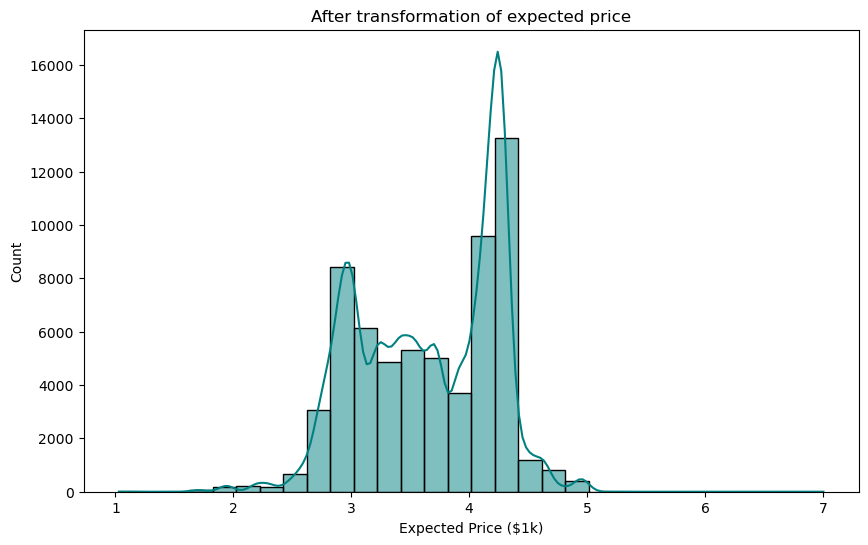

In [31]:
plt.figure(figsize=(10,6))
plt.title("After transformation of expected price")
sns.histplot(np.log(car["Expected Price ($1k)"]), bins=30, kde=True, color="teal")

In [32]:
# Apply the log transformation
car["Expected Price ($1k)"] = np.log(car["Expected Price ($1k)"])

In [33]:
pd.set_option("display.max_columns", None)

In [34]:
car.head()

ID  VIN (1-10)        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L    LYNNWOOD    WA     98037        2020   
1  EV40247  JN1AZ0CP8B  BELLINGHAM    WA     98229        2011   
2  EV12248  WBY1Z2C56F      TACOMA    WA     98422        2015   
3  EV55713  1G1RD6E44D     REDMOND    WA     98053        2013   
4  EV28799  1G1FY6S05K    PUYALLUP    WA     98375        2019   

   Electric Range  Base MSRP  Legislative District  DOL Vehicle ID  \
0             308          0                  32.0       109821694   
1              73          0                  40.0       137375528   
2              81          0                  27.0       150627382   
3              38          0                  45.0       258766301   
4             238          0                  25.0       296998138   

                Vehicle Location  Expected Price ($1k)  County_Adams  \
0   POINT (-122.287614 47.83874)              3.912023         False   
1  POINT (-122.414936 48.709388)              2.708050         False   
2  POINT (-122.396286 47.293138)              2.890372         False   
3  POINT (-122.024951 47.670286)              3.523415         False   
4  POINT (-122.321062 47.103797)              3.732418         False   

   County_Asotin  County_Benton  County_Chelan  County_Clallam  County_Clark  \
0          False          False          False           False         False   
1          False          False          False           False         False   
2          False          False          False           False         False   
3          False          False          False           False         False   
4          False          False          False           False         False   

   County_Columbia  County_Cowlitz  County_Douglas  County_Ferry  \
0            False           False           False         False   
1            False           False           False         False   
2            False           False           False         False   
3            False           False           False         False   
4            False           False           False         False   

   County_Flathead  County_Franklin  County_Grant  County_Grays Harbor  \
0            False            False         False                False   
1            False            False         False                False   
2            False            False         False                False   
3            False            False         False                False   
4            False            False         False                False   

   County_Island  County_Jefferson  County_King  County_Kitsap  \
0          False             False        False          False   
1          False             False        False          False   
2          False             False        False          False   
3          False             False         True          False   
4          False             False        False          False   

   County_Kittitas  County_Klickitat  County_Lewis  County_Lincoln  \
0            False             False         False           False   
1            False             False         False           False   
2            False             False         False           False   
3            False             False         False           False   
4            False             False         False           False   

   County_Mason  County_Multnomah  County_Okanogan  County_Pacific  \
0         False             False            False           False   
1         False             False            False           False   
2         False             False            False           False   
3         False             False            False           False   
4         False             False            False           False   

   County_Pend Oreille  County_Pierce  County_San Juan  County_Skagit  \
0                False          False            False          False   
1                False          False

FEATURE SELECTION

In [35]:
X = car.drop(columns=["ID", "VIN (1-10)", "City", "State","ZIP Code","Base MSRP", "Legislative District", "DOL Vehicle ID","Vehicle Location" ])  # Features
y = car["Expected Price ($1k)"] 

In [36]:
# Split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import numpy as np

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)


Infinite values in X_train: 2
Infinite values in X_test: 0


In [44]:
# Fill NaN values with median
X_train.fillna(X_train.median(), inplace=True)

# Check for any remaining NaN
print("Missing values in X_train after replacement:\n", X_train.isna().sum())


Missing values in X_train after replacement:
 Model Year                                                             0
Electric Range                                                         0
Expected Price ($1k)                                                   0
County_Adams                                                           0
County_Asotin                                                          0
                                                                      ..
Electric Utility_PUD NO 1 OF WHATCOM COUNTY                            0
Electric Utility_PUD NO 2 OF GRANT COUNTY                              0
Electric Utility_PUGET SOUND ENERGY INC                                0
Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
Length: 258, dtype: int64


In [45]:
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [46]:
print(np.isnan(X_train_scaled).sum())
print(np.isnan(y_train).sum())


0
0


In [47]:
print(X_train_scaled[np.isnan(X_train_scaled).any(axis=1)])  # Rows in X_train_scaled with NaN
print(y_train[np.isnan(y_train)])  # Rows in y_train with NaN


[]
[]


In [49]:
import numpy as np

# Ensure y_train is a NumPy array
y_train = np.array(y_train)

# Combine X_train_scaled and y_train to ensure rows align
combined_data = np.hstack((X_train_scaled, y_train.reshape(-1, 1)))

# Remove rows with NaN values
combined_data = combined_data[~np.isnan(combined_data).any(axis=1)]

# Split back into X and y
X_train_scaled = combined_data[:, :-1]
y_train = combined_data[:, -1]


In [54]:
import numpy as np

# Replace infinite values with NaN
y_train = np.where(np.isinf(y_train), np.nan, y_train)

# Check for NaN values
print("Missing values in y_train:", np.isnan(y_train).sum())

# Fill NaN values with the median
y_train = np.nan_to_num(y_train, nan=np.nanmedian(y_train))


Missing values in y_train: 0


In [55]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:\n RMSE: {rmse_linear:.4f}\n R²: {r2_linear:.4f}\n")

Linear Regression:
 RMSE: 0.0000
 R²: 1.0000



In [57]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_test_pred = linear_reg.predict(X_test_scaled)

# Evaluate
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")


Test RMSE: 0.0000
Test R²: 1.0000


In [58]:
# Check if any column in X is perfectly correlated with y
correlations = np.corrcoef(X_train_scaled.T, y_train)
print(correlations)


[[ 1.         -0.08170305  0.63007972 ...  0.0644497  -0.04330335
   0.63007972]
 [-0.08170305  1.          0.24388048 ...  0.06780957 -0.01355024
   0.24388048]
 [ 0.63007972  0.24388048  1.         ...  0.139283   -0.04798714
   1.        ]
 ...
 [ 0.0644497   0.06780957  0.139283   ...  1.         -0.12098732
   0.139283  ]
 [-0.04330335 -0.01355024 -0.04798714 ... -0.12098732  1.
  -0.04798714]
 [ 0.63007972  0.24388048  1.         ...  0.139283   -0.04798714
   1.        ]]


In [59]:
# Example: Identify highly correlated feature pairs
threshold = 0.9
correlated_features = np.where(np.abs(correlations) > threshold)
correlated_pairs = [
    (i, j) for i, j in zip(*correlated_features) if i != j
]
print("Highly correlated feature pairs:", correlated_pairs)


Highly correlated feature pairs: [(2, 258), (3, 193), (4, 195), (6, 249), (8, 222), (10, 223), (11, 250), (14, 225), (15, 254), (16, 226), (18, 233), (22, 228), (25, 213), (28, 232), (29, 252), (31, 216), (33, 230), (38, 231), (39, 214), (40, 257), (42, 196), (45, 172), (46, 92), (48, 108), (50, 145), (51, 97), (52, 80), (53, 128), (55, 100), (57, 122), (58, 175), (61, 90), (62, 133), (65, 144), (66, 131), (67, 150), (69, 153), (71, 103), (73, 99), (77, 132), (80, 52), (90, 61), (92, 46), (97, 51), (99, 73), (100, 55), (103, 71), (108, 48), (122, 57), (128, 53), (131, 66), (132, 77), (133, 62), (144, 65), (145, 50), (150, 67), (153, 69), (172, 45), (175, 58), (185, 186), (186, 185), (193, 3), (195, 4), (196, 42), (213, 25), (214, 39), (216, 31), (222, 8), (223, 10), (225, 14), (226, 16), (228, 22), (230, 33), (231, 38), (232, 28), (233, 18), (249, 6), (250, 11), (252, 29), (254, 15), (257, 40), (258, 2)]


In [60]:
to_drop = set()
for i, j in correlated_pairs:
    # Arbitrarily retain the feature with the lower index
    if j not in to_drop:
        to_drop.add(j)

print("Features to drop:", to_drop)


Features to drop: {2, 3, 4, 6, 8, 10, 11, 14, 15, 16, 18, 22, 25, 28, 29, 31, 33, 38, 39, 40, 42, 45, 46, 48, 50, 51, 52, 53, 55, 57, 58, 61, 62, 65, 66, 67, 69, 71, 73, 77, 80, 90, 92, 97, 99, 100, 103, 108, 122, 128, 131, 132, 133, 144, 145, 150, 153, 172, 175, 185, 186, 193, 195, 196, 213, 214, 216, 222, 223, 225, 226, 228, 230, 231, 232, 233, 249, 250, 252, 254, 257, 258}


In [61]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("Maximum index in correlated pairs:", max(max(pair) for pair in correlated_pairs))


X_train_scaled shape: (50464, 258)
Maximum index in correlated pairs: 258


In [63]:
corrected_pairs = [(i - 1, j - 1) for i, j in correlated_pairs]


In [64]:
to_drop = {j for i, j in corrected_pairs if j < X_train_scaled.shape[1]}
print("Features to drop:", to_drop)


Features to drop: {1, 2, 3, 5, 7, 9, 10, 13, 14, 15, 17, 21, 24, 27, 28, 30, 32, 37, 38, 39, 41, 44, 45, 47, 49, 50, 51, 52, 54, 56, 57, 60, 61, 64, 65, 66, 68, 70, 72, 76, 79, 89, 91, 96, 98, 99, 102, 107, 121, 127, 130, 131, 132, 143, 144, 149, 152, 171, 174, 184, 185, 192, 194, 195, 212, 213, 215, 221, 222, 224, 225, 227, 229, 230, 231, 232, 248, 249, 251, 253, 256, 257}


In [65]:
X_train_filtered = np.delete(X_train_scaled, list(to_drop), axis=1)
X_test_filtered = np.delete(X_test_scaled, list(to_drop), axis=1)
print("X_train_filtered shape:", X_train_filtered.shape)
print("X_test_filtered shape:", X_test_filtered.shape)


X_train_filtered shape: (50464, 176)
X_test_filtered shape: (12617, 176)


In [66]:
filtered_model = LinearRegression()

# Train the model on the filtered dataset
filtered_model.fit(X_train_filtered, y_train)

# Predictions on training and testing data
y_train_pred_filtered = filtered_model.predict(X_train_filtered)
y_test_pred_filtered = filtered_model.predict(X_test_filtered)

In [67]:
train_rmse_filtered = np.sqrt(mean_squared_error(y_train, y_train_pred_filtered))
train_r2_filtered = r2_score(y_train, y_train_pred_filtered)

# Calculate RMSE and R^2 for testing data
test_rmse_filtered = np.sqrt(mean_squared_error(y_test, y_test_pred_filtered))
test_r2_filtered = r2_score(y_test, y_test_pred_filtered)

# Display the results
print("Filtered Model Performance:")
print(f"Training RMSE: {train_rmse_filtered:.4f}")
print(f"Training R²: {train_r2_filtered:.4f}")
print(f"Testing RMSE: {test_rmse_filtered:.4f}")
print(f"Testing R²: {test_r2_filtered:.4f}")









Filtered Model Performance:
Training RMSE: 0.1954
Training R²: 0.8871
Testing RMSE: 0.1941
Testing R²: 0.8881


In [68]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_reg = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\n RMSE: {rmse_ridge:.4f}\n R²: {r2_ridge:.4f}\n")

Ridge Regression:
 RMSE: 0.0000
 R²: 1.0000



In [69]:
from sklearn.svm import SVR

# Initialize the model
svr_reg = SVR(kernel='linear')

# Fit the model to the training data
svr_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression:\n RMSE: {rmse_svr:.4f}\n R²: {r2_svr:.4f}\n")

Support Vector Regression:
 RMSE: 0.0609
 R²: 0.9890

